<br><br><center><h1 style="font-size:2em;color:#2467C0">Data Visualization with Python Modules</h1></center>
<br><center><h1 style="font-size:2em;color:#2467C0">by Tim John</h1></center>
<col width="550">
<col width="450">
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/4/46/North_South_divide.svg" align="middle" style="width:550px;height:360px;"/></td>
<td><p style="font-family: Arial; font-size:1.5em;color:black; font-style:bold">
    This is a data visualization project using Python modules (NumPy, Pandas, and Matplotlib). <br>NumPy and Pandas are two of my favorite Python modules for data analysis and scientific computation. Matplotlib is a feature-rich plotting module that can be used to create high-quality figures for data visualization.
The goal of this project is to demonstrate my approach to working with and visualizing large data sets.

<br>
<br>
The dataset used is  <a href="https://www.kaggle.com/worldbank/world-development-indicators">The World Development Indicators</a> dataset from the World Bank, which contains over a thousand annual indicators of economic development from hundreds of countries around the world.</p
</td>
</tr>

In [7]:
# Let's import our Python Modules and import the csv Data using Pandas:

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
data = pd.read_csv('Indicators.csv')

In [11]:
# The Numpy methods "Shape" and "Head" can be used to give us a preview of our data.
# From this, we can determine that our data set has over 5.6 million rows and 6 columns.

data.shape

(5656458, 6)

In [12]:
# Here we can see the header and the first few rows for the dataset.
# We are most interested in Country Name, Indicator Name, Year and Value in our analysis.

data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


# Simple Questions to Understand the Data Set

### How many unique countries are in our data?

In [13]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

### How many indicators are in our data?

In [15]:
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

### What range of years is covered in the data?

In [16]:
years = data['Year'].unique().tolist()
print(min(years)," to ",max(years))

1960  to  2015


# Graphing the data using Matplotlib

### I'm interested in graphing the CO2 emissions of the United States.
### Let's slice the data to get exactly the numbers we're looking for. 

In [63]:
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

slice1 = data['IndicatorName'].str.contains(hist_indicator) 
slice2 = data['CountryCode'].str.contains(hist_country)

stage = data[slice1 & slice2]
years = stage['Year'].values
co2 = stage['Value'].values

### Here's a simple bar chart of this data using Matplotlib.

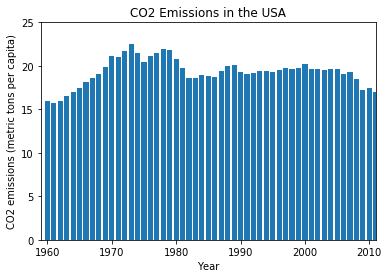

In [66]:
plt.bar(stage['Year'].values,stage['Value'].values)

plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

plt.title('CO2 Emissions in the USA')
plt.axis([1959,2011,0,25])
plt.show()

### Let's try exploring further with a histogram of CO2 emissions:

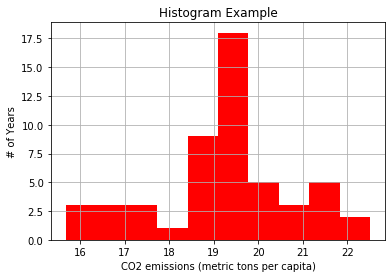

In [61]:
# Otherwise, let's look at all the data
hist_data = stage['Value'].values

# the histogram of the data
plt.hist(hist_data, 10, density=False, facecolor='red')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)

plt.show()

In [68]:
# Our histogram shows us that the US produces 19-20 metric tons of CO2 in most years, with some variation on both sides.

# Do Co2 emissions increase with US GDP per Capita?

## First, let's graph GDP per Capita

In [76]:
# We'll create a seperate stage variable for the GDP numbers.

hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'

slice1 = data['IndicatorName'].str.contains(hist_indicator) 
slice2 = data['CountryCode'].str.contains(hist_country)

gdp_stage = data[slice1 & slice2]


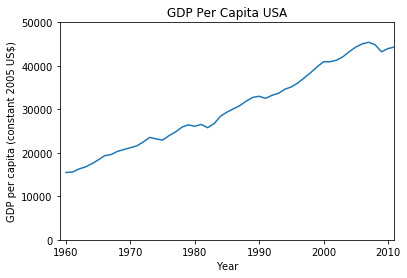

In [77]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita USA')

plt.axis([1959, 2011,0,50000])


plt.show()

## Graphing GDP against CO2 emissions using a Scatterplot

### In order to graph our two indicators against eachother, we need to make sure they use the same time range:

In [72]:
print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("CO2 Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())

GDP Min Year =  1960 max:  2014
CO2 Min Year =  1960 max:  2011


### Our GDP data ends in 2014, but our CO2 data ends in 2011. We need to truncate it so that they're the same.

In [73]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]

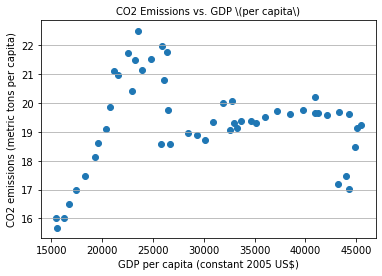

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()

### From our scatterplot, it's difficult to see a strong correlation between GDP per capita and CO2 emissions.

### We can calculate the correlation coefficient as follows:

In [75]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])